##### Note on the IPython Notebook

*The figures here are created with the IPython notebook. This is a useful tool when experimenting with plotting figures and doing simple mathematical or statistical analyses. Since at this point I am only exploring the paramter space of the equations behind the landscape evolution models, everything is self contained here. The code and in-line figure outputs make it easy to see where to make changes in the code. If you don't want to view the code, you can scroll down to the relevant output figures at the bottom.*

## Intro

These notes are part of a sensitivity analysis on the most commonly used fluvial erosion and sediment transport laws. Most of these empirically derived laws contain many parameters that are poorly constrained, difficult to measure directly, or have a high degree of uncertainty. The initial sensitivity analysis is done by exploring parameter space of the bedrock incision/stream power law. 

This work is done to quantify how sensitive the landscape is to climate and weather using established geomorphic transport functions (GTFs). In the context of the thesis as a whole, it should reveal in which situations climate (or weather) is the controlling factor in geomorphic processes and landscape evolution. 

When exploring paramter space, I have tried to collate from the literature the most frequently observed values from field studies. For example, the $m$ and $n$ parameters, and in particular the $m/n$ ratio is frequently reported to lie in the range of 0.3--0.7. Where these values are drawn from the literature, references will be provided.

## Background

One of the most commonly used geomorphic 'laws' used to describe landscape evolution is the bedrock stream power law (SPL). The SPL is a simple formulation that describes river incision into. Though highlighted by some as being too simplisitc, and a range of more complex models being proposed (Lague, 2013), it has been demosntrated to be widely applicable in a range of mountainous environements. The rate of bedrock incision at a given point in the channel, $I$, is given by:

\begin{equation}
I = KA^m S^n
\end{equation}

where $K$ is the erodibility coefficient, $A$ is the contributing drainaige area above the point, $S$ is the local gradient of the channel, and $m$ and $n$ are exponents, whose ratio is related to the concavity, $\theta$ of the river profile such that $\theta = m/n$.

Since this formula was originally arrived at, a drive has been made by several authors to make it more physcically-based. For example, one will note that in the above formula, there is no water discharge directly represented in the equation, despite water being the driving force behind erosion. Instead, the drainage area is used as a reasonable approximation, since empircal evidence suggests that draingage area scales with discharge in most cases. One such modification is made to incrporate discharge and the width of the channel as well as its gradient. In the CHILD landscape evolution model, the amount of potential erosion done to the bedrock surface is known as the *detachment capacity*, $D_c$. This capacity is based on calculating the shear stresses, $\tau_0$ on the channel bed by:

\begin{equation}
\tau_0 = K\left(\frac{Q}{W}\right)^mS^n
\end{equation}
such that,
\begin{equation}
D_c = K(\tau_0 - \tau_c)^{P_b}
\end{equation}

where $\tau_c$ is the critical shear stress, the threshold below which no erosion will take place. $P_b$ is an exponent which ranges from 0.6 -- 1.3.

In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

rho = 1000 # Water density
g = 9.8 # gravitational acceleration

#### Setting the constant values

In [2]:
movn = 0.5
m = 0.5
n = 1
k=0.01
w = 1
p_b = 1.0
s = 0.02
tau_crit = 0.0 
q_range = np.linspace(0.1, 20, 200)

#### Defining the $m$ sensitivity range

In [3]:
def m_ranges():
    
    m_range = np.linspace(0.3, 0.7, 200)    
    q_srf, m_srf = np.meshgrid(q_range, m_range)
    tau_zero = rho*g*k*((q_srf/w)**m_srf)*(s**n)
    Detach_cap = k*((tau_zero - tau_crit)**p_b)
    
    return q_srf, m_srf, Detach_cap

#### Defining the $n$ sensitivity range

In [4]:
def n_ranges():
    n_range = np.linspace(1, 2, 200)    
    q_srf, n_srf = np.meshgrid(q_range, n_range)
    tau_zero = rho*g*k*((q_srf/w)**m)*(s**n_srf)
    Detach_cap = k*((tau_zero - tau_crit)**p_b)
    
    return q_srf, n_srf, Detach_cap

#### Defining the $K$ range

The $K$ paramter is often referred to as the erodibility coefficient. It is represents a range of things such as lithology and a climate multiplier. Here I use a range from 0.001 to 0.02.

In [5]:
def k_ranges():
    
    k_range = np.linspace(0.001, 0.02, 200)
    q_srf, k_srf = np.meshgrid(q_range, k_range)
    tau_zero = rho*g*k_srf*((q_srf/w)**m)*(s**n)
    Detach_cap = k_srf*((tau_zero - tau_crit)**p_b)
    
    return q_srf, k_srf, Detach_cap

$P_b$ is used in the detatchment capacity law (such as implemented in the CHILD model). Not much info is provided on what it relates to physically! It tends to be around 1. I use a range from 0.66 to 1.33.

In [6]:
def pb_ranges():   
    pb_range = np.linspace(0.66, 1.33, 200)
    q_srf, pb_srf = np.meshgrid(q_range, pb_range)
    tau_zero = rho*g*k*((q_srf/w)**m)*(s**n)
    Detach_cap = k*((tau_zero - tau_crit)**pb_range)

    return q_srf, pb_srf, Detach_cap

In [7]:
fig = plt.figure(figsize=(12.5,12.5), dpi=100)
#ax = fig.add_subplot(2,2,1,projection='3d')

In [8]:
####  M SENSITIVITY
ax = fig.add_subplot(2,2,1,projection='3d')
q_srf, m_srf, D_c1 = m_ranges()

ax.plot_surface(q_srf, m_srf, D_c1, cmap=cm.hot_r)

ax.set_xlabel('Q (Discharge)')
ax.set_xlim(0.0, 20)

ax.set_ylabel('m (coeff.)')
ax.set_ylim(0.3, 0.7)

ax.set_zlabel('Detachment Capacity (Erosion)')
ax.set_zlim(0.0, 0.5)

(0.0, 0.5)

In [9]:
####  N SENSITIVITY
ax = fig.add_subplot(2,2,2,projection='3d')
q_srf, n_srf, D_c2 = n_ranges()

ax.plot_surface(q_srf, n_srf, D_c2, cmap=cm.hot_r)

ax.set_xlabel('Q (Discharge)')
ax.set_xlim(0.0, 20)

ax.set_ylabel('n (coeff.)')
ax.set_ylim(2, 1)

ax.set_zlabel('Detachment Capacity (Erosion)')
ax.set_zlim(0.0, 0.5)

(0.0, 0.5)

In [10]:
##### K SENSITIVITY 1
ax = fig.add_subplot(2,2,3,projection='3d')
q_srf, k_srf, D_c3 = k_ranges()
ax.plot_surface(q_srf, k_srf, D_c3, cmap=cm.hot_r)

ax.set_xlabel('Q (Discharge)')
ax.set_xlim(0.0, 20)

ax.set_ylabel('K (param)')
ax.set_ylim(0.001, 0.02)

ax.set_zlabel('Detachment Capacity (Erosion)')
ax.set_zlim(0.0, 0.5)

(0.0, 0.5)

In [11]:
##### K SENSITIVITY 2
ax = fig.add_subplot(2,2,4,projection='3d')
q_srf, k_srf, D_c4 = k_ranges()
ax.plot_surface(q_srf, k_srf, D_c3, cmap=cm.hot_r)

ax.set_xlabel('Q (Discharge)')
ax.set_xlim(0.0, 20)

ax.set_ylabel('K (param)')
ax.set_ylim(0.001, 0.02)

ax.set_zlabel('Detachment Capacity (Erosion)')
ax.set_zlim(0.0, 0.5)

(0.0, 0.5)

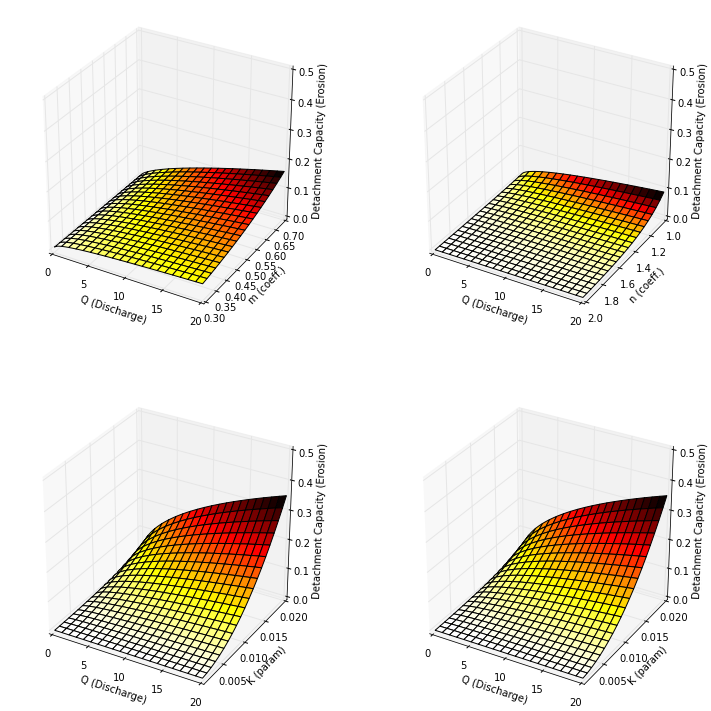

In [83]:
fig  # shows the figure inline in the Ipython notebook

The surfaces represent visually the extent to which varying the parameters in the SPL has on the resulting detachment capacity (and thus erosion). The scale (z) for detachment capacity is the same for all figures. At first glance of equation (1), those paramters that are exponents will potentially influence the outcome the most, but note that certain exponents are reported in the literature to be around 1, minimising this effect. The $K$ paramter, however, varies by several orders of magnitude and is difficult to constrain from field evidence, due to its dependence on other factors. Discharge, $Q$ is also highly variable. In this example the range of $Q$ I used were from reported values of discharge for upland streams in the UK over the last 30 years (<a href= "http://www.ceh.ac.uk/data/nrfa/data/search.html">National River Flow Archives</a>). Global datasets would potentially result in much greater variance in discharge values.